In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
import statistics

In [3]:
frequency = 20 #Hz, frequency of oscillation we are forcing (triangular voltage input)
meas_len = 5 #5 seconds of measurement
time_display_start = 0 #x-axis start of all plots
time_display_stop = 1 #x-axis limit for all plots
workbook_name = "tweezers_data.xlsx"
sheet_name = '2micron'
viscosity = 0.0009532 #pN*s/micron^2
bead_diameter = 2 #microns

temperature = 298 #Kelvin

In [4]:
tweezers_data_file = pd.ExcelFile(workbook_name)
df_tweezers = pd.read_excel(tweezers_data_file, sheet_name)
arr_tweezers = df_tweezers.to_numpy()
qpd_laser_powers = arr_tweezers[:,0]
qpd_sens_avg = arr_tweezers[:,1]

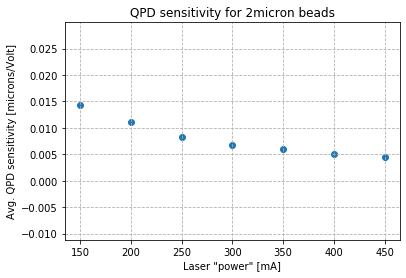

In [5]:
#Plot avg. QPD sensitivity as a function of laser power
plt.scatter(qpd_laser_powers, qpd_sens_avg)
plt.xlabel('Laser "power" [mA]')
plt.ylabel('Avg. QPD sensitivity [microns/Volt]')
plt.title("QPD sensitivity for " + sheet_name + " beads")
plt.grid(linestyle='--')

In [5]:
xls_file = pd.ExcelFile("PSD_mar17.xlsx") #just load the excel file containing PSD data

In [36]:
#reading each sheet into a data frame
df_150mA = pd.read_excel(xls_file, '150mA')
df_200mA = pd.read_excel(xls_file, '200mA')
df_250mA = pd.read_excel(xls_file, '250mA')
df_300mA = pd.read_excel(xls_file, '300mA')
df_350mA = pd.read_excel(xls_file, '350mA')
df_400mA = pd.read_excel(xls_file, '400mA')

In [48]:
n_of_datapoints = len(df_150mA.index) #how many time values are taken?
time = np.arange(0,meas_len,meas_len/n_of_datapoints) #create a new array with time series

#just displaying the dataframe's header to check that everything has loaded correctly + renaming the columns:
df_150mA['Time'] = time
df_150mA.rename(columns={"Dev1/ai0": "dev1", "Dev1/ai1": "dev2", "Dev1/ai2": "dev3"}, inplace=True) #replace the name
df_150mA.head()

,dev1,dev2,dev3,Time
0,0.527766,-0.616079,5.113845,0.00000
1,0.529367,-0.624083,5.118000,0.00001
2,0.520400,-0.627604,5.118959,0.00002
3,0.516558,-0.630165,5.103617,0.00003
4,0.529687,-0.633687,5.101699,0.00004


In [38]:
#convert PSD measurement dataframe to numpy arrays (I lowkey hate to work with this dataframe format)
arr_150mA = df_150mA.to_numpy()
arr_200mA = df_200mA.to_numpy()
arr_250mA = df_250mA.to_numpy()
arr_300mA = df_300mA.to_numpy()
arr_350mA = df_350mA.to_numpy()
arr_400mA = df_400mA.to_numpy()

In [203]:
picked_power = 150 #mA

stokes_laser_powers = np.array([150, 200, 250, 300, 350, 400])

laser_power_index = int(np.where(stokes_laser_powers == picked_power)[0])
laser_power_arrays = [arr_150mA, arr_200mA, arr_250mA, arr_300mA, arr_350mA, arr_400mA]
picked_dev = laser_power_arrays[laser_power_index]

In [204]:
#load each column into an np array:
qpd_x = picked_dev[:,0]
qpd_y = picked_dev[:,1]
qpd_z = picked_dev[:,2]

Text(0, 0.5, 'QPD voltage (V)')

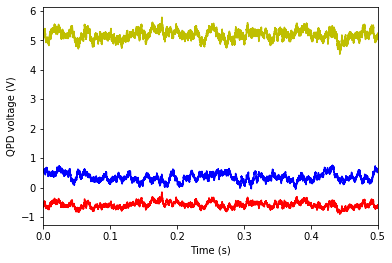

In [205]:
#just plotting qpd voltage data versus time here
plt.plot(time, qpd_x, 'b')
plt.plot(time, qpd_y, 'r')
plt.plot(time, qpd_z, 'y')
plt.xlim(time_display_start, time_display_stop)
plt.xlabel('Time (s)')
plt.ylabel('QPD voltage (V)')

In [206]:
qpd_laser_power_index = int(np.where(qpd_laser_powers == picked_power)[0])
qpd_sens = qpd_sens_avg[qpd_laser_power_index] #microns/volt
print(qpd_sens, " microns/volt qpd sensitivity at ", picked_power, " mA laser power")

0.014249999999999999  microns/volt qpd sensitivity at  150  mA laser power


In [207]:
x_variance = statistics.variance(qpd_x) #in qpd voltage
y_variance = statistics.variance(qpd_y)

In [208]:
x_pos_variance = x_variance * qpd_sens * 1E-6# variance of bead displacement in meters
y_pos_variance = y_variance * qpd_sens * 1E-6

In [210]:
def find_kb(pos_variance, stiffness, temp):
    kb = stiffness * pos_variance / temp
    return(kb)

In [211]:
kb = find_kb(x_pos_variance, stiffness, temperature)
print(kb)

1.7527486262165953e-23
